## 1. Description

- datetime - hourly date + timestamp 
-season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
-holiday - whether the day is considered a holiday
-workingday - whether the day is neither a weekend nor holiday
-weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
           2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
           3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
-temp - temperature in Celsius
-atemp - "feels like" temperature in Celsius
-humidity - relative humidity
-windspeed - wind speed
-casual - number of non-registered user rentals initiated
-registered - number of registered user rentals initiated
-count - number of total rentals

#### <u>The problem related to regression between classification and regression <u>
=> Because it is a problem to predict the amount of bicycle rental.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'test.csv',
 'to-predict-the-demand-for-bike-eda.ipynb',
 'train.csv']

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

## 2. **Data Infromation**

In [5]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime

>  -> Need to predict 'casual', 'registered', 'count' \
      Extract the factors that affect 'casual', 'registered', 'count' the most

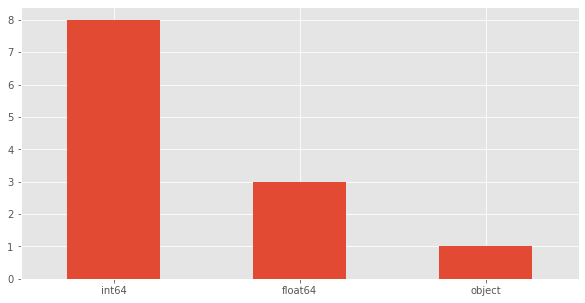

In [6]:
train_df.dtypes.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Does not exist NULL, and there are 8 int, 3 float, and 1 object types. \
Also, it is worth noting that the datatime type is set to object, so the preprocessing process with datatime is necessary.

In [7]:
train_df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [8]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

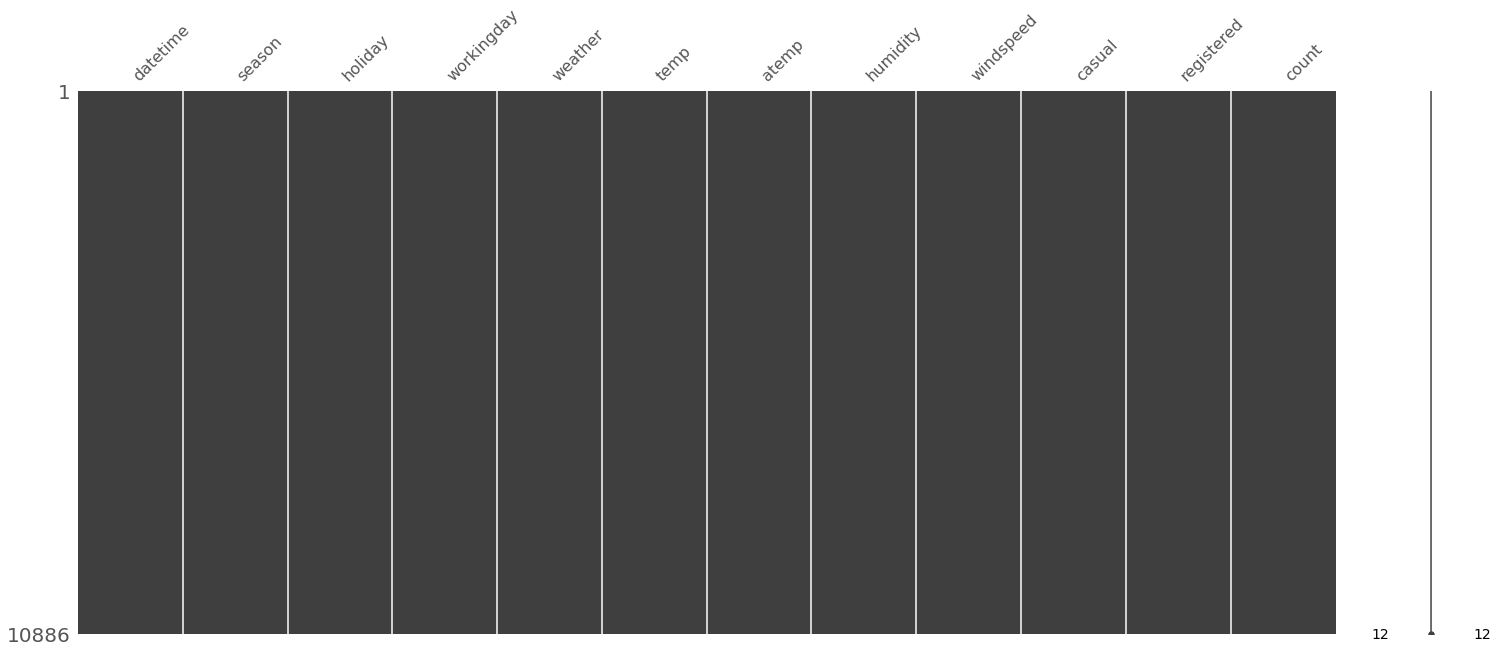

In [9]:
import missingno as msno
msno.matrix(train_df)

> There is not exist NULL

## 3. Preprocessing 
datetime's type change to datetime (originaly was object type)

In [10]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='%Y-%m-%d')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df.shape

(10886, 19)

In [12]:
train_df.head()

#weekday : 0-Mon, 1-Tue, 2-Wed, 3-Thu, 4-Fri, 5-Sat, 6-Sun

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  weekday  
0       0       0        5  
1       0       0        5  
2       0       0        5  
3       0       0        5  
4       0       0        5

## 4. EDA (Visualize the amount of rent per time)

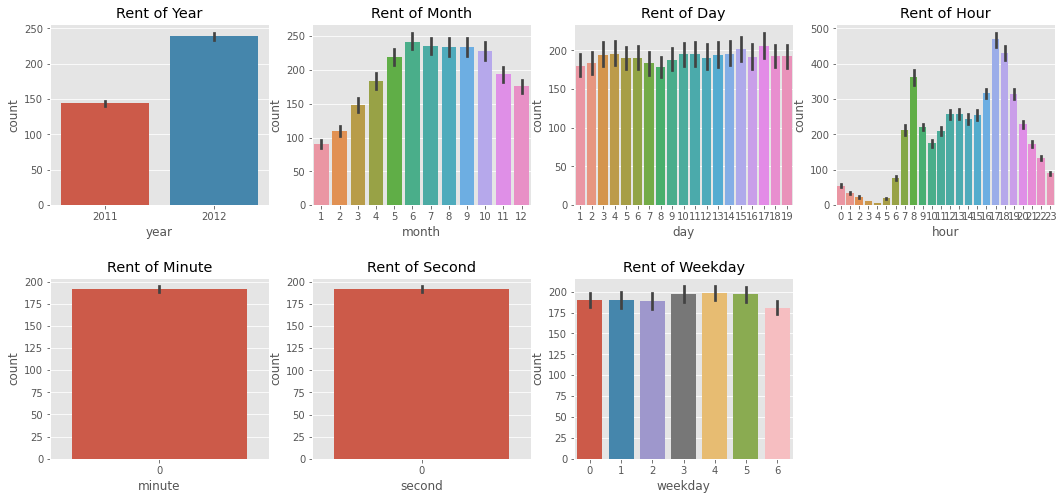

In [13]:
plt.figure(figsize=(18,8))

plt.subplot(241)
sns.barplot(data=train_df, x='year', y='count')
plt.title('Rent of Year')

plt.subplot(242)
sns.barplot(data=train_df, x='month', y='count')
plt.title('Rent of Month')

plt.subplot(243)
sns.barplot(data=train_df, x='day', y='count')
plt.title('Rent of Day')

plt.subplot(244)
sns.barplot(data=train_df, x='hour', y='count')
plt.title('Rent of Hour')

plt.subplot(245)
sns.barplot(data=train_df, x='minute', y='count')
plt.title('Rent of Minute')

plt.subplot(246)
sns.barplot(data=train_df, x='second', y='count')
plt.title('Rent of Second')

plt.subplot(247)
sns.barplot(data=train_df, x='weekday', y='count')
plt.title('Rent of Weekday')

plt.subplots_adjust(hspace=.4)
plt.show()

* Year : The utilization rate increased 1.5 times in 2012 from 2011. \
(In 2011, users may have promoted and recommended it to people around them, and the utilization rate may have increased in 2012.)
* month : The usage rate is higher in warm seasons than in cold days.
* day : The data only exists until 19th. so can not using it as a feature. just only refer to it
* minute : There is no values, only have zero data
* second : There is no values, only have zero data
* weekday : It has a relatively even distribution from Monday to Sunday.

In [14]:
# Remove 'minute' & 'second'
train_df.drop(['day', 'minute', 'second'], axis=1, inplace=True)
train_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  hour  weekday  
0        81        0.0       3          13     16  2011      1     0        5  
1        80        0.0       8          32     40  2011      1     1        5  
2        80        0.0       5          27     32  2011      1     2        5  
3        75        0.0       3          10     13  2011      1     3        5  
4        75        0.0       0           1      1  2011      1     4        5

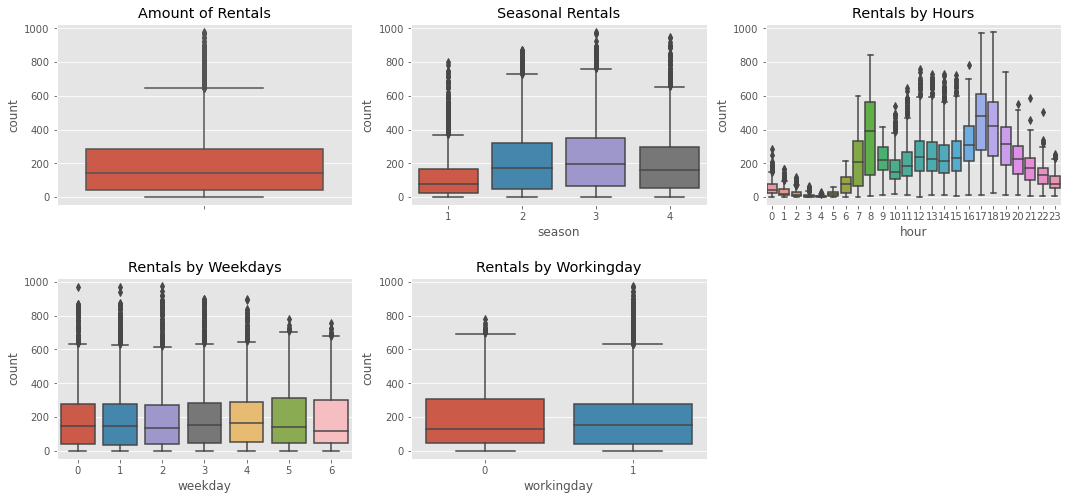

In [15]:
plt.figure(figsize=(18,8))

plt.subplot(231)
sns.boxplot(data=train_df, y='count', orient='v')   # orient='v' -> make a box vertically
plt.title('Amount of Rentals')

plt.subplot(232)
sns.boxplot(data=train_df, y='count', x='season', orient='v')   
plt.title('Seasonal Rentals')

plt.subplot(233)
sns.boxplot(data=train_df, y='count', x='hour', orient='v')   
plt.title('Rentals by Hours')

plt.subplot(234)
sns.boxplot(data=train_df, y='count', x='weekday', orient='v')   
plt.title('Rentals by Weekdays')

plt.subplot(235)
sns.boxplot(data=train_df, y='count', x='workingday', orient='v')   
plt.title('Rentals by Workingday')

plt.subplots_adjust(hspace=.4)
plt.show()

* Amount of rentals : concentrated in a specific section.
* Seasonal rentals : autumn > summer > winter > spring, the rental volume is high.
* Rentals by workingday : similar, but the amount of rentals on holidays is slightly higher than on working days.

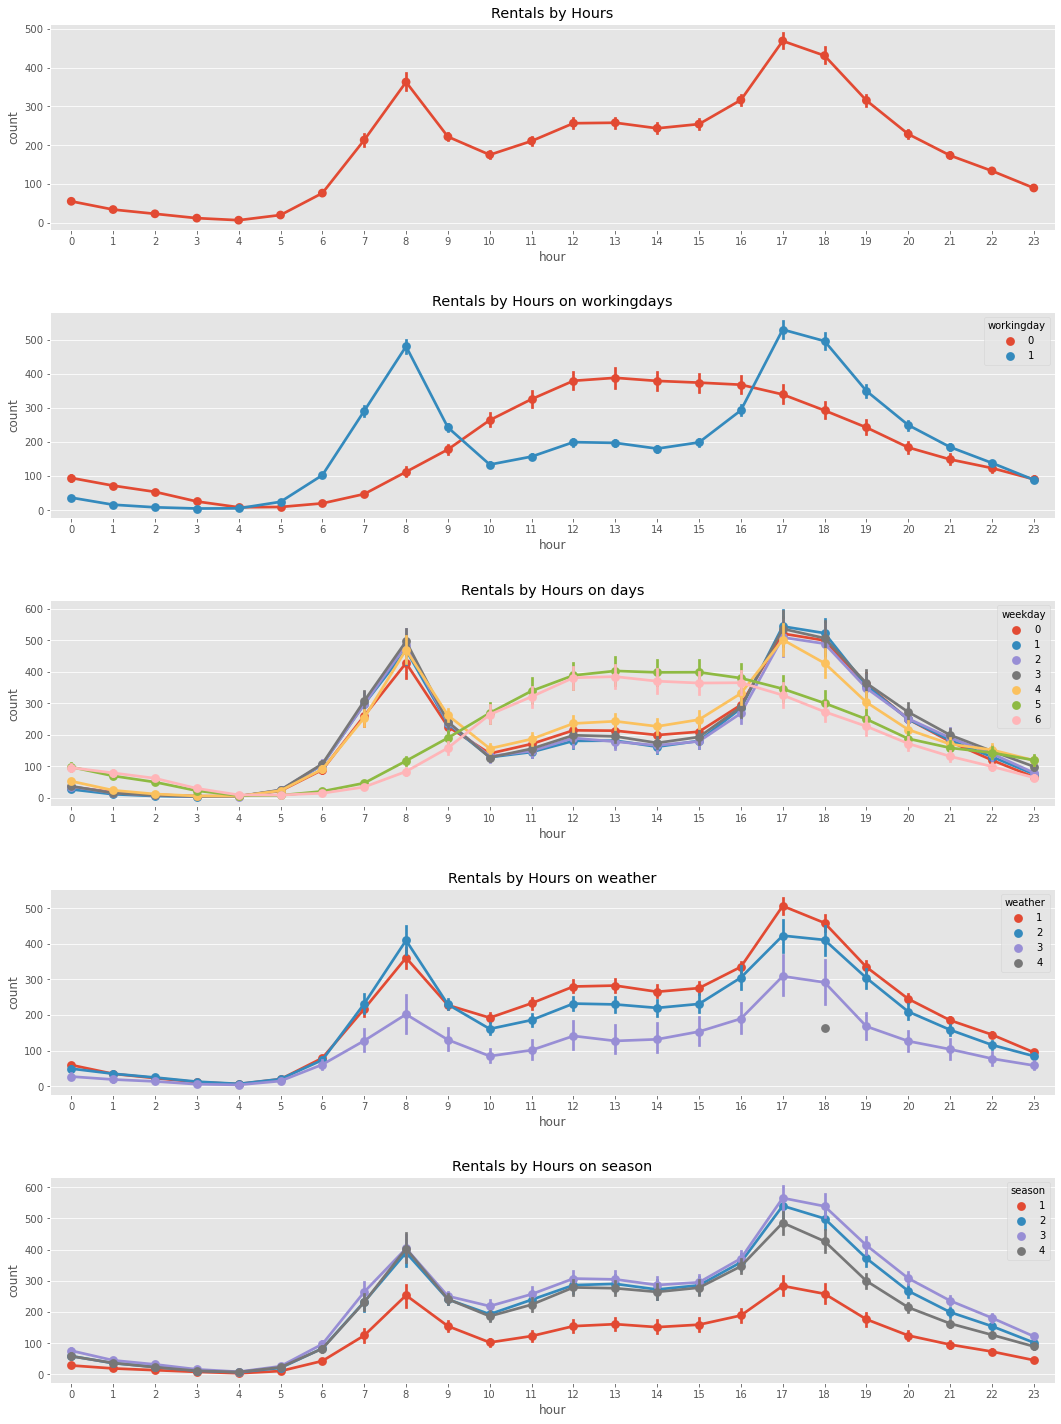

In [16]:
plt.figure(figsize=(18,25))

plt.subplot(511)
sns.pointplot(data=train_df, x='hour', y='count')
plt.title('Rentals by Hours')

plt.subplot(512)
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday')
plt.title('Rentals by Hours on workingdays')

plt.subplot(513)
sns.pointplot(data=train_df, x='hour', y='count', hue='weekday')
plt.title('Rentals by Hours on days')

plt.subplot(514)
sns.pointplot(data=train_df, x='hour', y='count', hue='weather')
plt.title('Rentals by Hours on weather')

plt.subplot(515)
sns.pointplot(data=train_df, x='hour', y='count', hue='season')
plt.title('Rentals by Hours on season')

plt.subplots_adjust(hspace=.4)
plt.show()

### 4-1. correlation heatmap (상관관계 히트맵)

In [17]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [18]:
corrMatt = train_df.iloc[:,3:11]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

            workingday   weather      temp     atemp  humidity  windspeed  \
workingday    1.000000  0.033772  0.029966  0.024660 -0.010880   0.013373   
weather       0.033772  1.000000 -0.055035 -0.055376  0.406244   0.007261   
temp          0.029966 -0.055035  1.000000  0.984948 -0.064949  -0.017852   
atemp         0.024660 -0.055376  0.984948  1.000000 -0.043536  -0.057473   
humidity     -0.010880  0.406244 -0.064949 -0.043536  1.000000  -0.318607   
windspeed     0.013373  0.007261 -0.017852 -0.057473 -0.318607   1.000000   
casual       -0.319111 -0.135918  0.467097  0.462067 -0.348187   0.092276   
registered    0.119460 -0.109340  0.318571  0.314635 -0.265458   0.091052   

              casual  registered  
workingday -0.319111    0.119460  
weather    -0.135918   -0.109340  
temp        0.467097    0.318571  
atemp       0.462067    0.314635  
humidity   -0.348187   -0.265458  
windspeed   0.092276    0.091052  
casual      1.000000    0.497250  
registered  0.497250    1.

<AxesSubplot:>

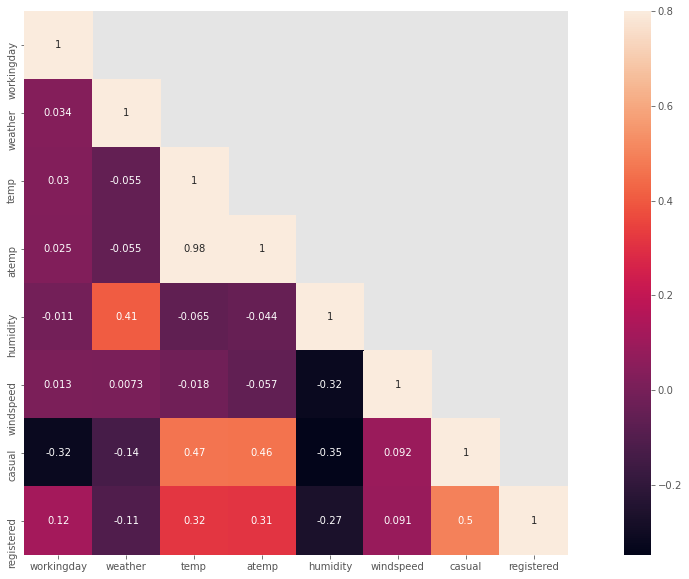

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corrMatt, mask=mask, annot=True, square=True, vmax=.8)

* Temperature, humidity, and wind speed are hardly related.

* Most have relation with rental rate is registered, but the test data does not have this value.

* Atemp and temp have a high correlation of 0.98, but they may not be suitable for use as features due to temp and atemp.

* 온도, 습도, 풍속은 연관관계가 거의 없다고 볼 수 있다.

* 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, test 데이터에는 이 값이 없다.

* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처를 사용하기에 적합하지 않을 수 있다.

### 4-2. Remove Outliers

* method 1 => IQR = Q3 - Q1
                  Outliers = Q1 - IQR*1.5 / Q3 + IQR*1.5
* method 2 => outliers = avg +- 3*Standard deviation.

Text(0.5, 1.0, 'Amount of Rentals(original)')

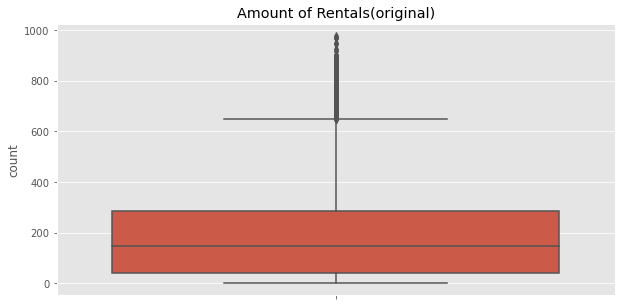

In [20]:
sns.boxplot(data=train_df, y='count', orient='v')
plt.title('Amount of Rentals(original)')

In [21]:
count_Q1 = np.percentile(train_df['count'], 25)
count_Q3 = np.percentile(train_df['count'], 75)

In [22]:
count_IQR = count_Q3 - count_Q1
count_IQR

242.0

In [23]:
# method 1
train_clean = train_df[(train_df['count'] >= (count_Q1-(1.5*count_IQR))) & (train_df['count'] <= (count_Q3+(1.5*count_IQR)))]

Text(0.5, 1.0, 'Amount of Rentals(remove outliers by method1)')

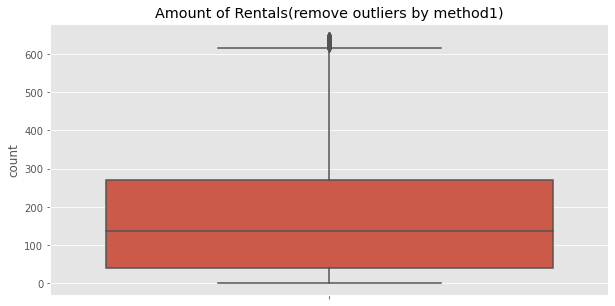

In [24]:
sns.boxplot(data=train_clean, y='count', orient='v')
plt.title('Amount of Rentals(remove outliers by method1)')

In [25]:
# method 2
train_clean_2 = (train_clean[np.abs(train_clean['count'] - train_clean['count'].mean() <=
                  (3*train_clean['count'].std()))])

Text(0.5, 1.0, 'Amount of Rentals(remove outliers by method2)')

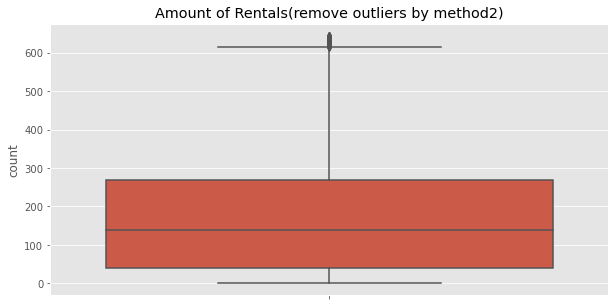

In [26]:
sns.boxplot(data=train_clean_2, y='count', orient='v')
plt.title('Amount of Rentals(remove outliers by method2)')

* The outliers have significantly decreased compared to the previous one
* 이상치가 눈에띄게 줄어든 것을 확인 할 수 있다.

### 4-3. Data normalization.

* "Datetime" type data cannot be used in linear regression, so convert it to a numeric type.
* "Datetim" 타입은 선형회귀에서 사용할 수 없으므로 숫자형 타입으로의 변환이 필요하다.

In [27]:
def to_int(datetime):
    return 10000*datetime.year + 100*datetime.month + datetime.day

datetime_int = train_clean['datetime'].apply(lambda x: to_int(x))
datetime_int

0        20110101
1        20110101
2        20110101
3        20110101
4        20110101
           ...   
10881    20121219
10882    20121219
10883    20121219
10884    20121219
10885    20121219
Name: datetime, Length: 10586, dtype: int64

In [28]:
train_clean['datetime'] = pd.Series(datetime_int)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  int64  
 1   season      10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   atemp       10586 non-null  float64
 7   humidity    10586 non-null  int64  
 8   windspeed   10586 non-null  float64
 9   casual      10586 non-null  int64  
 10  registered  10586 non-null  int64  
 11  count       10586 non-null  int64  
 12  year        10586 non-null  int64  
 13  month       10586 non-null  int64  
 14  hour        10586 non-null  int64  
 15  weekday     10586 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.4 MB


<ipython-input-28-df777e344a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['datetime'] = pd.Series(datetime_int)


In [29]:
train_clean

datetime  season  holiday  workingday  weather   temp   atemp  \
0      20110101       1        0           0        1   9.84  14.395   
1      20110101       1        0           0        1   9.02  13.635   
2      20110101       1        0           0        1   9.02  13.635   
3      20110101       1        0           0        1   9.84  14.395   
4      20110101       1        0           0        1   9.84  14.395   
...         ...     ...      ...         ...      ...    ...     ...   
10881  20121219       4        0           1        1  15.58  19.695   
10882  20121219       4        0           1        1  14.76  17.425   
10883  20121219       4        0           1        1  13.94  15.910   
10884  20121219       4        0           1        1  13.94  17.425   
10885  20121219       4        0           1        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  year  month  hour  \
0            81     0.0000       3          13     16  2011      1     0   
1            80     0.0000       8          32     40  2011      1     1   
2            80     0.0000       5          27     32  2011      1     2   
3            75     0.0000       3          10     13  2011      1     3   
4            75     0.0000       0           1      1  2011      1     4   
...         ...        ...     ...         ...    ...   ...    ...   ...   
10881        50    26.0027       7         329    336  2012     12    19   
10882        57    15.0013      10         231    241  2012     12    20   
10883        61    15.0013       4         164    168  2012     12    21   
10884        61     6.0032      12         117    129  2012     12    22   
10885        66     8.9981       4          84     88  2012     12    23   

       weekday  
0            5  
1            5  
2            5  
3            5  
4            5  
...        ...  
10881        2  
10882        2  
10883        2  
10884        2  
10885        2  

[10586 rows x 16 columns]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

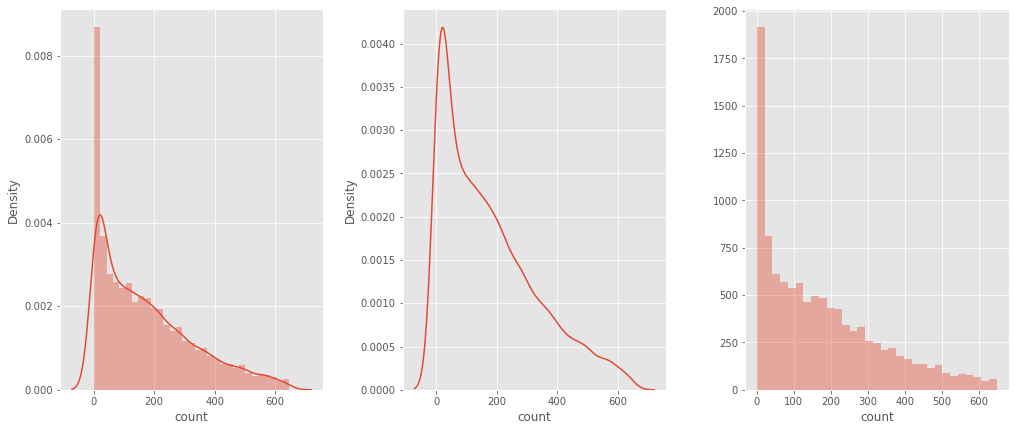

In [30]:
plt.figure(figsize=(17,7))

plt.subplot(131)
sns.distplot(train_clean['count'])

plt.subplot(132)
sns.distplot(train_clean['count'], hist=False)

plt.subplot(133)
sns.distplot(train_clean['count'], kde=False)

plt.subplots_adjust(wspace=.3)
plt.show()

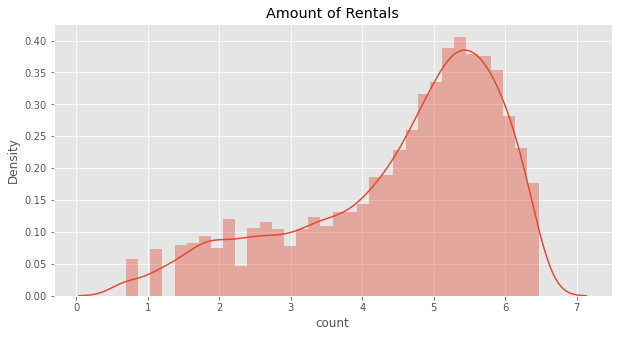

In [31]:
sns.distplot(np.log1p(train_clean)['count'])
plt.title('Amount of Rentals')
plt.show()

* To make it into a normal distribution form, we log data to transform the data values, and although it does not follow a completely altered normal distribution form, it is closer to a slightly normal distribution form than before.

* 정규분포 형태로 만들기 위해 데이터에 로그를 씌워 데이터 값을 변형했고 완변한 정규분포 형태를 따르지는 않지만 이전보다 약간의 정규분포 형태에 가까워졌다


## 5. Modeling

In [32]:
train_clean.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [33]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

* Remove two features (casual, registered) that are not in test_df and match the column using date data to test_df.
* test_df에 없는 두 feature(casual, registered)를 제거하고 test_df에도 날짜데이터를 활용한 컬럼을 맞춰준다

In [34]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='%Y-%m-%d')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [35]:
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df.shape

(6493, 13)

In [36]:
train_clean.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [37]:
train_clean.drop(columns=['registered', 'casual'], axis=1, inplace=True)
train_clean.shape

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(10586, 14)

In [38]:
test_df.shape

(6493, 13)

In [39]:
#for linear regression, trasform into numeric type.

test_df['datetime'] = pd.Series(test_df['datetime'].apply(lambda x : to_int(x)))
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   int64  
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   year        6493 non-null   int64  
 10  month       6493 non-null   int64  
 11  hour        6493 non-null   int64  
 12  weekday     6493 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 659.6 KB


* Except for the target variable 'count', the number of features and form of training data and test data matched.
* 타켓 변수인 'count'를 제외하고 훈련데이터와 테스트데이터의 feature 수와 형태가 일치한다.

### 5-1. Split Data (데이터셋 나누기)

In [40]:
# target과 features 구분
train_x = train_clean.drop(columns='count', axis=1)   # 문제
train_y = train_clean['count']                        # 정답
test_x = test_df

In [41]:
from sklearn.linear_model import LinearRegression

#선형회귀모델 선언
linear_model = LinearRegression()

#모델 학습
linear_model.fit(train_x, train_y)

#예측
linear_model.predict(test_x)

#평가
linear_model.score(train_x, train_y)

0.3943640156410949

In [42]:
train_clean.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'hour',
       'weekday'],
      dtype='object')

In [43]:
from statsmodels.formula.api import ols

ols('count ~ datetime + season + holiday + workingday + weather + temp + atemp + humidity + windspeed + year + month + hour + weekday',
    data=train_clean).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     529.5
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:37:15   Log-Likelihood:                -65848.
No. Observations:               10586   AIC:                         1.317e+05
Df Residuals:                   10572   BIC:                         1.318e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.181e+05   4788.303    -24.655      0.000   -1.27e+05   -1.09e+05
datetime       0.1953      0.216      0.902      0.367      -0.229       0.619
season        -6.1394      4.523     -1.357      0.175     -15.006       2.727
holiday        7.3152      8.694      0.841      0.400      -9.727      24.357
workingday    -3.5939      4.312     -0.833      0.405     -12.047       4.859
weather       -3.5816      2.079     -1.722      0.085      -7.658       0.494
temp           0.3396      0.941      0.361      0.718      -1.505       2.184
atemp          5.0820      0.866      5.865      0.000       3.384       6.780
humidity      -1.8455      0.077    -24.106      0.000      -1.996      -1.695
windspeed      0.6560      0.160      4.111      0.000       0.343       0.969
year       -1894.0426   2163.735     -0.875      0.381   -6135.371    2347.286
month        -10.9815     21.687     -0.506      0.613     -53.491      31.528
hour           7.3123      0.180     40.690      0.000       6.960       7.665
weekday        1.8882      0.991      1.905      0.057      -0.055       3.831
==============================================================================
Omnibus:                     1456.237   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2219.710
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       4.060   Cond. No.                     8.14e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
ols('count ~ atemp + humidity + windspeed + hour', data=train_clean).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1359.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:37:15   Log-Likelihood:                -66308.
No. Observations:               10586   AIC:                         1.326e+05
Df Residuals:                   10581   BIC:                         1.327e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.9173      7.070      7.909      0.000      42.059      69.776
atemp          6.2310      0.148     42.196      0.000       5.942       6.520
humidity      -1.8053      0.070    -25.848      0.000      -1.942      -1.668
windspeed      0.2637      0.160      1.644      0.100      -0.051       0.578
hour           7.1905      0.186     38.580      0.000       6.825       7.556
==============================================================================
Omnibus:                     1643.276   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2636.278
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       4.192   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""